# Assignment 1: Decision Tree Grid Search
## DTSC 680: Applied Machine Learning

## Name: Ejegu Smith

## Directions

The main purpose of this assignment is for you to gain experience creating and visualizing a Decision Tree along with sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [1]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.40, random_state=0)

## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`. 
6. Print the accuracy score to the screen.


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

preds = tree_clf.predict(X_test)

acc_score = accuracy_score(y_test, preds)


print('Accuracy=%s' % (acc_score))

Accuracy=0.95


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[1,2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor: 
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid. 
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
           'max_depth': [1,2,3,4,5,8,16,32],
           'max_leaf_nodes': list(range(2, 20, 1)),
           'min_samples_split':[2,3,4,5,8,12,16,20]
}

grid_search_cv = GridSearchCV(tree_clf, param_grid, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)



print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:    3.8s finished


In [14]:
from sklearn.metrics import precision_score, recall_score

y_pred = tree_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.95
Precision=0.95
Recall=0.95


## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
#text report showing the rules of a decision tree
tree_clf2 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_split=2,random_state=42)
tree_clf2.fit(X_train, y_train)

from sklearn.tree import export_text

r = export_text(tree_clf2,feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 5.05
|   |   |--- class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. Use `filled=True` as an argument to the method to add color to the image.

[Text(133.92000000000002, 181.2, 'X[2] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

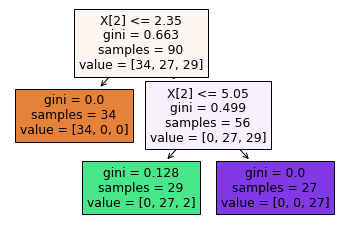

In [16]:
from sklearn import tree

tree.plot_tree(tree_clf2, filled=True)

## Critical Analysis

In your own words, describe or interpret the role of the gini score criterion in the decision tree algorithm. How does this compare to the entropy impurity measure? Finally, sklearn uses the CART (Classification and Regression Tree) algorithm to train Decision Trees. How does this algorithm determine the feature and threshold value to use for splitting at each step of the Decision Tree algorithm? It may be helpful to look at outside resources to help you answer these questions (The YouTube channel ["StatQuest"](https://youtu.be/7VeUPuFGJHk) has some excellent videos on Decision Trees for those of you that like visual explanations.) 

Make sure that you answer all the questions above. I am looking for **meaningful content** here that **goes into detail**. Don't just copy from the textbook or rush through answering this question.

The Gini score criterion calculates the 'impurity' in a decision tree algorithm. More specifically, the Gini score is calculated by taking (1 - (probability of 'yes')^2) - (1 - (probability of 'no')^2) for each leaf node, then take the weighted average of the leaf node impuritites to calculate the final Gini impurity. The Gini impurity measure is the default, but you may use the Entropy impurity measure as an alternative. Entropy impurity is calculated by taking the -(% of positives * log of % of positves) - (% of negatives * log of % of negatives) for a given subset. The results for both methods are very similar, however Entropy produces more evenly distributed trees while Gini partions the most frequent class in it's own branch. Furthermore, the CART algorithm splits each step of the decision tree by identifying the value that minimizes the mean squared error. 

## Ungraded Critical Thinking Question

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased. Is that what you had expected? We perform a round of grid searching in order to elucidate the optimal hyperparameter values. Why, then, has the accuracy score decreased? Most importantly, what caused this decrease in the accuracy score and why? Explain your answer.

(Write analysis here.)